In [1]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

In [2]:
import graphviz as gv

The function $\texttt{toDot}(\texttt{Parent})$ takes a dictionary $\texttt{Parent}$.
For every node $x$, $\texttt{Parent}[x]$ is the parent of $x$.   It draws this dictionary 
as a family tree using `graphviz`, i.e. for every node $x$ it draws an arrow starting at $x$ and pointing 
to $\texttt{Parent}[x]$.  The roots of the trees are indicated by double circles.

In [3]:
def toDot(Parent):
    dot = gv.Digraph()
    M   = Parent.keys()
    for x in M:
        p = Parent[x]        
        if x == p:
            dot.node(str(x), shape='doublecircle')
        else:
            dot.node(str(x), shape='circle')
            dot.edge(str(x), str(p))
    return dot

# A Tree Based Implementation of the Union-Find Algorithm

Given a set $M$ and a binary relation $R \subseteq M \times M$, the function $\texttt{union_find}$ returns a partition $\mathcal{P}$ of $M$ such that we have
$$ \forall \langle x, y \rangle \in R: \exists S \in \mathcal{P}: \bigl(x \in S \wedge y \in S\bigr) $$
The resulting partition defines the equivalence relation that is generated by $R$.

In [4]:
def union_find(M, R):
    Parent = { x: x for x in M } 
    Height = { x: 1 for x in M }
    for x, y in R:
        print(f'{x} ≅ {y}')
        root_x = find(x, Parent)
        root_y = find(y, Parent)
        if root_x != root_y:
            if Height[root_x] < Height[root_y]:
                Parent[root_x] = root_y
            elif Height[root_x] > Height[root_y]:
                Parent[root_y] = root_x
            else:
                Parent[root_y]  = root_x
                Height[root_x] += 1
            display(toDot(Parent))
    Roots = { x for x in M if Parent[x] == x }
    return [{y for y in M if find(y, Parent) == r} for r in Roots]

Given a dictionary `Parent` and an element $x$ from $M$, the function $\texttt{find}(x, \texttt{Parent})$ 
returns the ancestor of $x$ that is its own parent.

In [5]:
def find(x, Parent):
    p = Parent[x]
    if p == x:
        return x
    return find(p, Parent)

In [6]:
def demo():
    M = set(range(1, 10))
    R = { (1, 4), (7, 9), (3, 5), (2, 6), (5, 8), (1, 9), (4, 7) }
    P = union_find(M, R)
    return P

7 ≅ 9


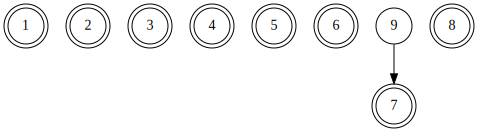

4 ≅ 7


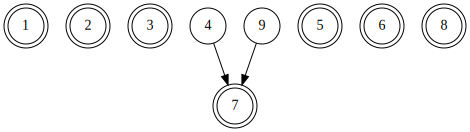

3 ≅ 5


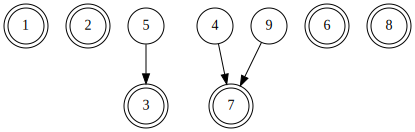

2 ≅ 6


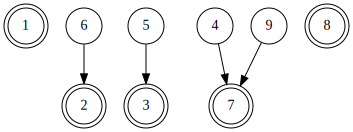

5 ≅ 8


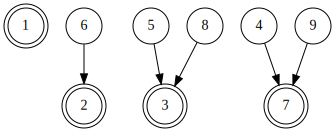

1 ≅ 9


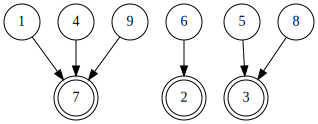

1 ≅ 4


[{2, 6}, {3, 5, 8}, {1, 4, 7, 9}]

In [7]:
demo()

The former worst case is now actually the best case.

In [8]:
def worst_case(n):
    M = set(range(1, n+1))
    R = [ (k+1, k) for k in M if k < n ]
    print(f'R = {R}')
    P = union_find(M, R)
    print(f'P = {P}')

R = [(2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8), (10, 9)]
2 ≅ 1


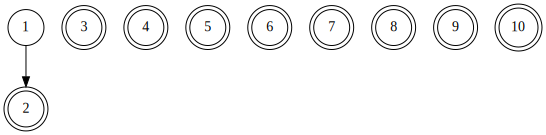

3 ≅ 2


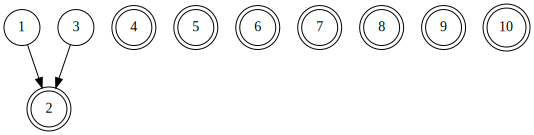

4 ≅ 3


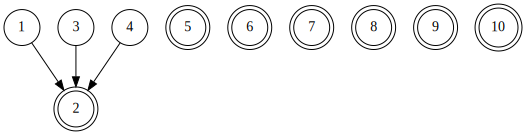

5 ≅ 4


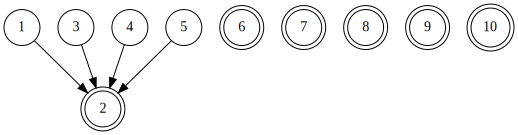

6 ≅ 5


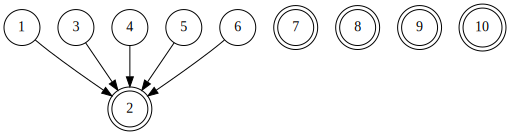

7 ≅ 6


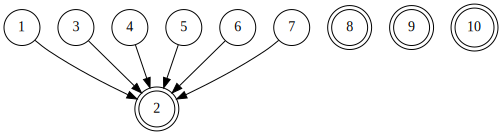

8 ≅ 7


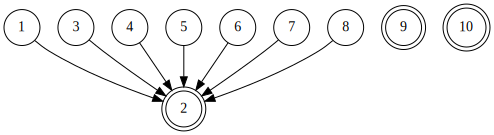

9 ≅ 8


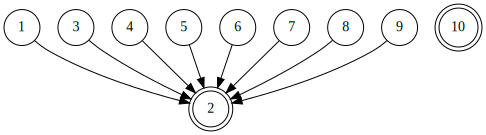

10 ≅ 9


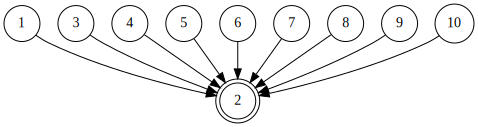

P = [{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]


In [9]:
worst_case(10)

If the pairs are combined more or less randomly, the trees grow at most logarithmically.

In [10]:
def worst_case_set(n):
    M = set(range(1, n+1))
    R = { (k+1, k) for k in M if k < n }
    print(f'R = {R}')
    P = union_find(M, R)
    print(f'P = {P}')

R = {(2, 1), (6, 5), (4, 3), (8, 7), (5, 4), (7, 6), (9, 8), (10, 9), (3, 2)}
2 ≅ 1


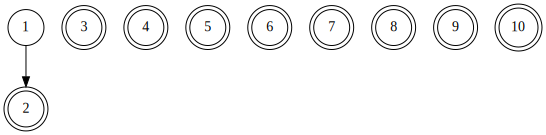

6 ≅ 5


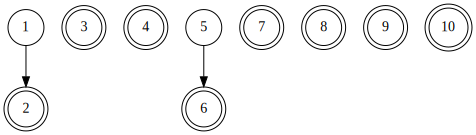

4 ≅ 3


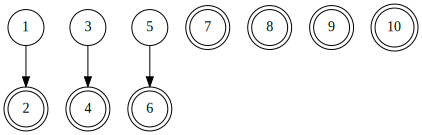

8 ≅ 7


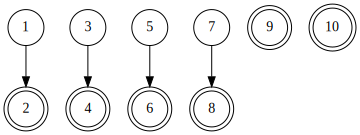

5 ≅ 4


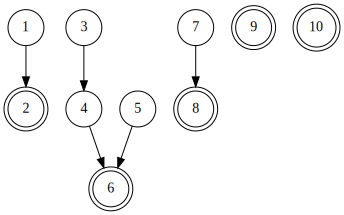

7 ≅ 6


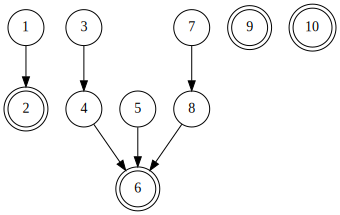

9 ≅ 8


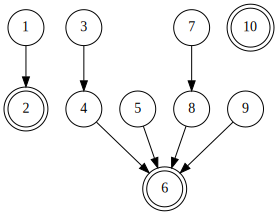

10 ≅ 9


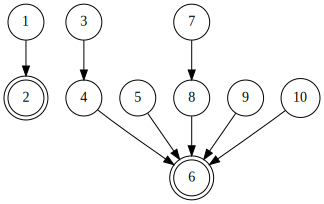

3 ≅ 2


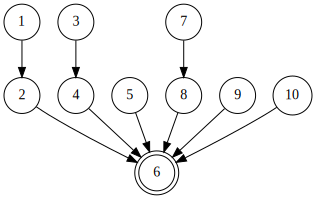

P = [{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]


In [11]:
worst_case_set(10)